https://www.analyticsvidhya.com/blog/2021/12/text-classification-of-news-articles/

ปัญหาของข้อมูลชุดนี้
- ไม่รู้ว่า Label คือ column ใด
- ต้องเปลี่ยน Keywords จาก List เป็น String
- ลบเครื่องหมายต่างๆ

In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### import data from cleansing

In [36]:
%store -r df

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  4480 non-null   object
 1   keywords  4480 non-null   object
 2   doc_type  4480 non-null   object
 3   ind       4480 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 140.1+ KB


In [76]:
df['doc_type'].value_counts()

article       4199
multimedia     278
audio            3
Name: doc_type, dtype: int64

In [62]:
text = "Asian and europe and asian"

In [64]:
text.find("Asian")

0

In [38]:
type(df.keywords)

pandas.core.series.Series

In [79]:
def find_string(a, b, c):
    string = []
    for i in df[a]:
        string.append(i.find(c))
    df[b] = string    
    return df[[a,b]].loc[df[b] > -1]

In [84]:
len(find_string('keywords', 'ind', '[]'))

414

In [12]:
df.describe()

,headline,keywords,doc_type
count,4480,4480,4480
unique,4420,3006,3
top,What to Cook This Weekend,[],article
freq,5,414,4199


#### Word cloud

In [16]:
headline = df['headline']

In [17]:
string = '' 

In [18]:
for i in headline:
    string += ' '+ i

In [19]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(string)

#### Word cloud for all articles

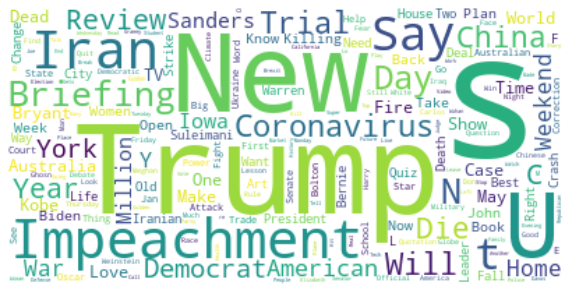

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()